In [1]:
from project_3_indicator import run_calculation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def set_plot_style():
    plt.style.use('default')  # Reset to default style

    # Color definitions
    colors = {
        'charcoal': '#333333',
        'cerulean': '#077FAE',
        'goldenrod': '#C29044',
        'fern': '#548451',
        'amethyst': '#786EAE',
        'celadon': '#90C9A6'
    }

    # Style parameters
    plt.rcParams.update({
        # Font settings
        'font.size': 12,
        'axes.labelsize': 12,
        'axes.titlesize': 14,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,

        # Color settings
        'axes.edgecolor': colors['charcoal'],
        'axes.labelcolor': colors['charcoal'],
        'xtick.color': colors['charcoal'],
        'ytick.color': colors['charcoal'],

        # Grid settings
        'grid.color': '#CCCCCC',
        'grid.linestyle': '--',
        'grid.alpha': 0.5,

        # Figure settings
        'figure.facecolor': 'none',
        'axes.facecolor': 'none',

        # Legend settings
        'legend.framealpha': 0.9,
        'legend.edgecolor': colors['charcoal']
    })

    return colors

INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.4)
INFO:paramiko.transport:Authentication (publickey) successful!
INFO:project_3_indicator.input.specification:Creating input specification for helium_CASSCF(2,2)_aug-cc-pVQZ
INFO:project_3_indicator.input.specification:Dependencies validated successfully.
INFO:project_3_indicator.input.specification:Using default basis set 'aug-cc-pVQZ'.
INFO:root:Found completed calculation CALC_000015


Connected to atlas.
Geometry for helium successfully loaded.
Method name: CASSCF(2,2) False
Disconnected from cluster.


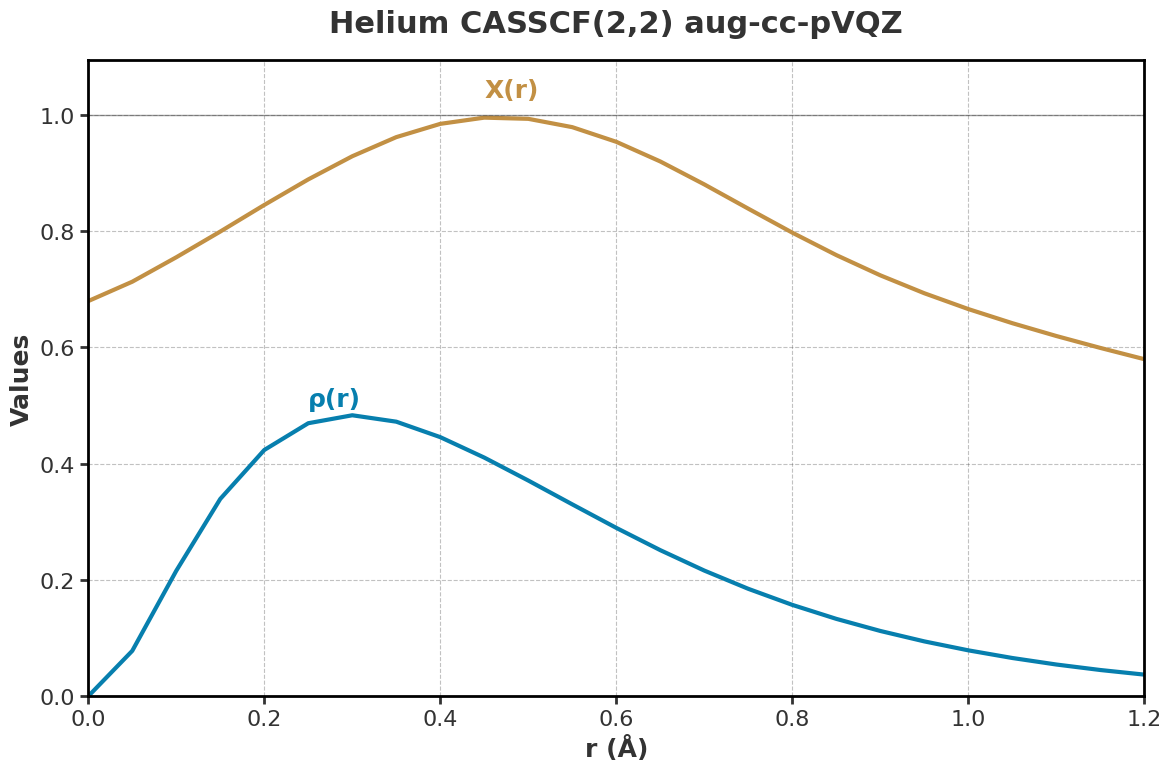

In [19]:
def plot_helium_components(result):
    """
    Enhanced plot for PowerPoint presentation showing transformed density, transformed on-top values,
    and indicator for Helium CASSCF(2,2) with aug-cc-pVQZ basis, all on a single axis.
    """
    import numpy as np
    import matplotlib.pyplot as plt

    # Ensure we're working with the correct calculation
    if not (result['molecule_name'] == 'helium' and
            result['method_name'] == 'CASSCF(2,2)' and
            result['basis_name'] == 'aug-cc-pVQZ'):
        raise ValueError("This function requires Helium CASSCF(2,2) aug-cc-pVQZ calculation results")

    # Set up the plot style with larger elements for presentation
    plt.rcParams.update({
        'font.size': 16,
        'axes.labelsize': 18,
        'axes.titlesize': 20,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'legend.fontsize': 16,
        'lines.linewidth': 3
    })

    # Define colors
    colors = {
        'charcoal': '#333333',
        'cerulean': '#077FAE',    # Density
        'fern': '#548451',        # On-top
        'goldenrod': '#C29044'    # Indicator
    }

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.patch.set_alpha(0.0)  # Transparent background
    ax.patch.set_alpha(0.0)   # Transparent plot background

    # Get the data
    df = result['ontop_data']

    # Calculate the transformations and indicator
    df['density_4pir2'] = df['density'] * (4 * np.pi * df['r']**2)
    df['ontop_4pir2'] = df['ontop'] * (4 * np.pi * df['r']**2)
    df['sqrt_ontop_4pir2'] = np.sqrt(df['ontop_4pir2'])
    df['X(r)'] = 2 * df['ontop'] / (df['density']**2)

    # Plot only up to r = 1.2
    mask = df['r'] <= 1.2
    r_values = df.loc[mask, 'r']

    # Normalize values for better visualization on same scale
    density_max = df.loc[mask, 'density_4pir2'].max()
    ontop_max = df.loc[mask, 'sqrt_ontop_4pir2'].max()

    # Plot transformed values
    density_line, = ax.plot(r_values, df.loc[mask, 'density_4pir2'],
                 color=colors['cerulean'], linewidth=3)



    # Plot indicator
    indicator_line, = ax.plot(r_values, df.loc[mask, 'X(r)'],
                    color=colors['goldenrod'], linewidth=3)

    # Add reference line at y = 1 for indicator
    ax.axhline(y=1, color=colors['charcoal'], linewidth=1, linestyle='-', alpha=0.5)

    # Find peak values for label placement
    density_peak_idx = df.loc[mask, 'density_4pir2'].idxmax()
    ontop_peak_idx = df.loc[mask, 'sqrt_ontop_4pir2'].idxmax()

    # Add text labels near peaks
    density_peak_r = df.loc[density_peak_idx, 'r']
    density_peak_val = df.loc[density_peak_idx, 'density_4pir2']

    ontop_peak_r = df.loc[ontop_peak_idx, 'r']
    ontop_peak_val = df.loc[ontop_peak_idx, 'sqrt_ontop_4pir2']

    ax.annotate('ρ(r)',
                xy=(0.3, 0.6),
                xytext=(0.25, 0.5),
                color=colors['cerulean'],
                fontsize=18,
                fontweight='bold')



    # Annotate indicator at r=1.0
    indicator_at_one = df[df['r'] == 1.0]['X(r)'].values[0]
    ax.annotate('X(r)',
                xy=(1.0, indicator_at_one),
                xytext=(0.45, 1.03),
                color=colors['goldenrod'],
                fontsize=18,
                fontweight='bold')

    # Customize axes labels and limits
    ax.set_xlabel('r (Å)', color=colors['charcoal'], fontweight='bold')
    ax.set_ylabel('Values', color=colors['charcoal'], fontweight='bold')

    ax.set_xlim(0, 1.2)

    # Set y-limits to ensure all curves are visible
    all_values = [
        df.loc[mask, 'density_4pir2'],
        df.loc[mask, 'sqrt_ontop_4pir2'],
        df.loc[mask, 'X(r)']
    ]
    min_val = min([v.min() for v in all_values])
    max_val = max([v.max() for v in all_values])

    # Add some margin
    margin = (max_val - min_val) * 0.1
    ax.set_ylim(max(0, min_val - margin), max_val + margin)

    # Title
    plt.title('Helium CASSCF(2,2) aug-cc-pVQZ',
              fontsize=22, color=colors['charcoal'], fontweight='bold', pad=20)

    # Customize grid
    ax.grid(True, linestyle='--', alpha=0.3, color=colors['charcoal'])

    # Customize ticks - make them bolder
    ax.tick_params(colors=colors['charcoal'], width=2, length=6)

    for spine in ax.spines.values():
        spine.set_linewidth(2)

    plt.tight_layout()
    return fig



# Usage:
# Assuming you have the largest basis set result stored in a variable:
results = run_calculation(
    molecule_name="helium",
    method_name="CASSCF(2,2)",
    basis_name='aug-cc-pVQZ',
)
fig = plot_helium_components(results)
plt.show()

In [39]:
# Define basis sets
basis_sets = ['aug-cc-pVDZ', 'aug-cc-pVTZ', 'aug-cc-pVQZ']

# Run parallel calculations
results = run_calculation(
    molecule_name="helium",
    method_name="CASSCF(2,2)",
    basis_name=basis_sets,
)

INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.4)


INFO:paramiko.transport:Authentication (publickey) successful!


Connected to atlas.


INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.4)
INFO:paramiko.transport:Authentication (publickey) successful!


Connected to atlas.


INFO:project_3_indicator.input.specification:Creating input specification for helium_CASSCF(2,2)_aug-cc-pVDZ
INFO:project_3_indicator.input.specification:Dependencies validated successfully.
INFO:project_3_indicator.input.specification:Using default basis set 'aug-cc-pVDZ'.
INFO:root:Found completed calculation CALC_000006


Geometry for helium successfully loaded.
Method name: CASSCF(2,2) False


Disconnected from cluster.


INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.4)
INFO:paramiko.transport:Authentication (publickey) successful!


Connected to atlas.


INFO:project_3_indicator.input.specification:Creating input specification for helium_CASSCF(2,2)_aug-cc-pVTZ
INFO:project_3_indicator.input.specification:Dependencies validated successfully.
INFO:project_3_indicator.input.specification:Using default basis set 'aug-cc-pVTZ'.
INFO:root:Found completed calculation CALC_000007


Geometry for helium successfully loaded.
Method name: CASSCF(2,2) False


Disconnected from cluster.


INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.4)
INFO:paramiko.transport:Authentication (publickey) successful!


Connected to atlas.


INFO:project_3_indicator.input.specification:Creating input specification for helium_CASSCF(2,2)_aug-cc-pVQZ
INFO:project_3_indicator.input.specification:Dependencies validated successfully.
INFO:project_3_indicator.input.specification:Using default basis set 'aug-cc-pVQZ'.
INFO:root:Found completed calculation CALC_000015


Geometry for helium successfully loaded.
Method name: CASSCF(2,2) False


Disconnected from cluster.
Disconnected from cluster.


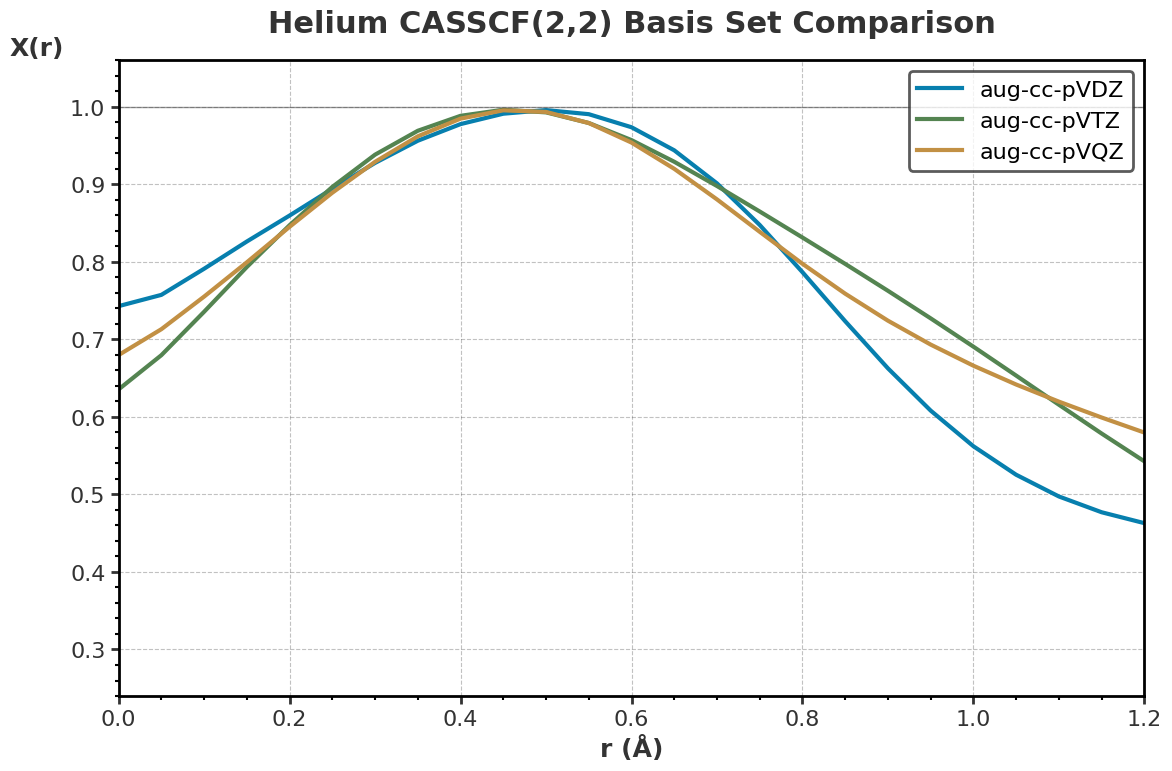

In [41]:
def plot_helium_basis_comparison(results):
    """Enhanced plot for PowerPoint presentation comparing basis sets for Helium CASSCF(2,2)."""
    import matplotlib.pyplot as plt
    import numpy as np

    # Set up the plot style with larger elements for presentation
    plt.rcParams.update({
        'font.size': 16,
        'axes.labelsize': 18,
        'axes.titlesize': 20,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'legend.fontsize': 16,
        'lines.linewidth': 3
    })

    # Define colors
    colors = {
        'charcoal': '#333333',
        'cerulean': '#077FAE',    # DZ
        'fern': '#548451',        # TZ
        'goldenrod': '#C29044'    # QZ
    }

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.patch.set_alpha(0.0)  # Transparent background
    ax.patch.set_alpha(0.0)   # Transparent plot background

    # Color map for basis sets
    color_map = {
        'aug-cc-pVDZ': colors['cerulean'],
        'aug-cc-pVTZ': colors['fern'],
        'aug-cc-pVQZ': colors['goldenrod']
    }

    # Plot data for each basis set
    for result in results:
        df = result['ontop_data']
        basis = result['basis_name']

        # Calculate indicator
        df['X(r)'] = 2 * df['ontop'] / (df['density']**2)

        # Plot only up to r = 1.2
        mask = df['r'] <= 1.2
        ax.plot(df.loc[mask, 'r'], df.loc[mask, 'X(r)'],
                color=color_map[basis], linewidth=3, label=basis)

    # Add reference line at y = 1
    ax.axhline(y=1, color=colors['charcoal'], linewidth=1, linestyle='-', alpha=0.5)

    # Customize axes labels and limits
    ax.set_xlabel('r (Å)', color=colors['charcoal'], fontweight='bold')
    ax.set_ylabel('X(r)', color=colors['charcoal'], fontweight='bold', rotation=0, loc='top')

    # Set axis limits
    ax.set_xlim(0, 1.2)

    # Determine y limits based on data
    all_y_values = []
    for result in results:
        df = result['ontop_data']
        df['X(r)'] = 2 * df['ontop'] / (df['density']**2)
        mask = df['r'] <= 1.2
        all_y_values.extend(df.loc[mask, 'X(r)'].tolist())

    y_min = min(all_y_values)
    y_max = max(all_y_values)
    margin = (y_max - y_min) * 0.1

    # Round limits to make numbers cleaner
    y_min_rounded = np.floor(y_min * 10) / 10
    y_max_rounded = np.ceil(y_max * 10) / 10

    ax.set_ylim(max(0, y_min_rounded - margin), y_max_rounded + margin)

    # Add title
    plt.title('Helium CASSCF(2,2) Basis Set Comparison',
              fontsize=22, color=colors['charcoal'], fontweight='bold', pad=20)

    # Add legend with clear background and border
    legend = ax.legend(frameon=True, loc='upper right', fontsize=16,
                      facecolor='white', edgecolor=colors['charcoal'])
    legend.get_frame().set_linewidth(2)

    # Enhance tick marks and grid
    ax.grid(True, linestyle='--', alpha=0.3, color=colors['charcoal'])
    ax.tick_params(colors=colors['charcoal'], width=2, length=6)

    # Make axis lines more visible
    for spine in ax.spines.values():
        spine.set_linewidth(2)

    # Add minor tick marks
    ax.minorticks_on()
    ax.tick_params(which='minor', length=3, width=1.5)

    plt.tight_layout()
    return fig

# Usage:
# Assuming 'results' contains your basis set comparison data
fig = plot_helium_basis_comparison(results)
plt.show()

In [27]:
# Run calculations for different methods with aug-cc-pVQZ
method_results = run_calculation(
        molecule_name="helium",
        method_name=["HF","CASSCF(2,2)","CISD"],
        basis_name="aug-cc-pVQZ",
    )


INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.4)
INFO:paramiko.transport:Authentication (publickey) successful!


Connected to atlas.


INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.4)
INFO:paramiko.transport:Authentication (publickey) successful!


Connected to atlas.


INFO:project_3_indicator.input.specification:Creating input specification for helium_HF_aug-cc-pVQZ
INFO:project_3_indicator.input.specification:Dependencies validated successfully.
INFO:project_3_indicator.input.specification:Using default basis set 'aug-cc-pVQZ'.
INFO:root:Found completed calculation CALC_000011


Geometry for helium successfully loaded.
Method name: HF True


Disconnected from cluster.


INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.4)
INFO:paramiko.transport:Authentication (publickey) successful!


Connected to atlas.


INFO:project_3_indicator.input.specification:Creating input specification for helium_CASSCF(2,2)_aug-cc-pVQZ
INFO:project_3_indicator.input.specification:Dependencies validated successfully.
INFO:project_3_indicator.input.specification:Using default basis set 'aug-cc-pVQZ'.
INFO:root:Found completed calculation CALC_000015


Geometry for helium successfully loaded.
Method name: CASSCF(2,2) False


Disconnected from cluster.


INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.4)
INFO:paramiko.transport:Authentication (publickey) successful!


Connected to atlas.


INFO:project_3_indicator.input.specification:Creating input specification for helium_CISD_aug-cc-pVQZ
INFO:project_3_indicator.input.specification:Dependencies validated successfully.
INFO:project_3_indicator.input.specification:Using default basis set 'aug-cc-pVQZ'.
INFO:root:Found completed calculation CALC_000034


Geometry for helium successfully loaded.
Method name: CISD False


Disconnected from cluster.
Disconnected from cluster.


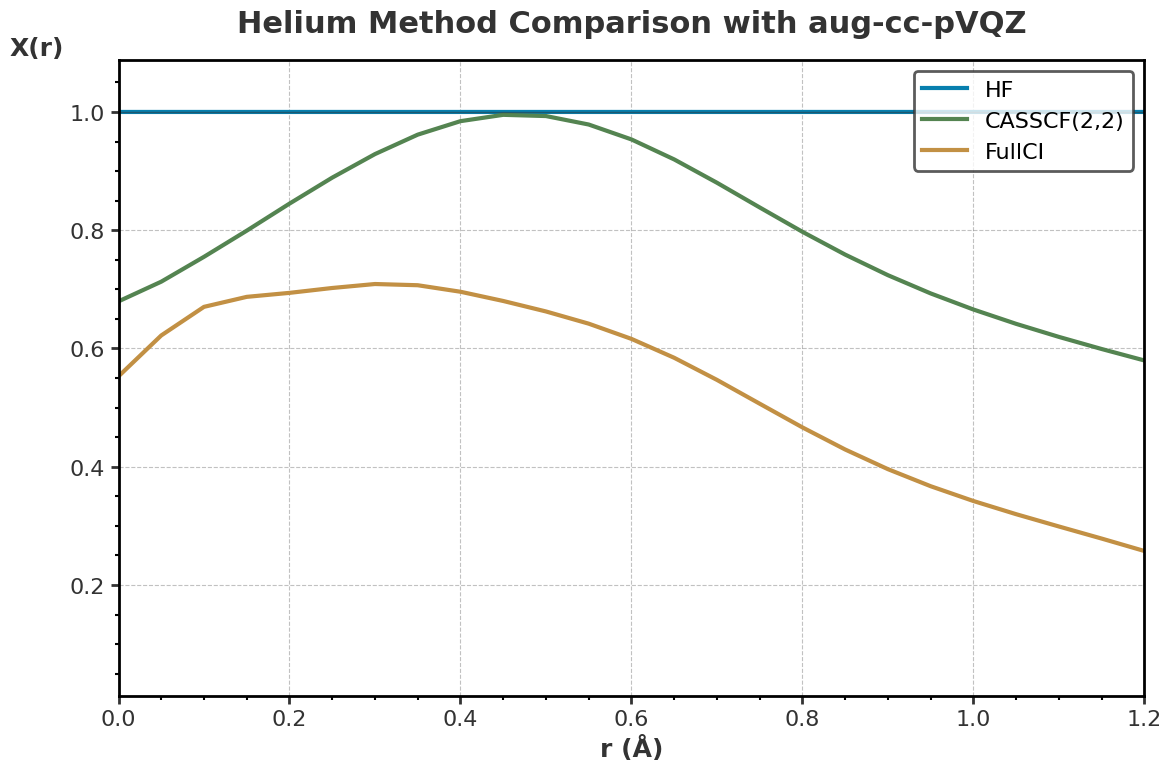

In [37]:
def plot_helium_method_comparison(results):
    """
    Enhanced plot for PowerPoint presentation comparing different methods
    for Helium calculations using aug-cc-pVQZ basis set.
    """
    import matplotlib.pyplot as plt
    import numpy as np

    # Set up the plot style with larger elements for presentation
    plt.rcParams.update({
        'font.size': 16,
        'axes.labelsize': 18,
        'axes.titlesize': 20,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'legend.fontsize': 16,
        'lines.linewidth': 3
    })

    # Define colors
    colors = {
        'charcoal': '#333333',
        'cerulean': '#077FAE',    # DZ
        'fern': '#548451',        # TZ
        'goldenrod': '#C29044'    # QZ
    }

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.patch.set_alpha(0.0)  # Transparent background
    ax.patch.set_alpha(0.0)   # Transparent plot background

    # Color map for methods (with CISD labeled as FullCI)
    color_map = {
        'HF': colors['cerulean'],
        'CASSCF(2,2)': colors['fern'],
        'CISD': colors['goldenrod']
    }

    # Label map (renames CISD to FullCI in the legend)
    label_map = {
        'HF': 'HF',
        'CASSCF(2,2)': 'CASSCF(2,2)',
        'CISD': 'FullCI'
    }

    # Plot data for each method
    for result in results:
        df = result['ontop_data']
        method = result['method_name']

        # Calculate indicator
        df['X(r)'] = 2 * df['ontop'] / (df['density']**2)

        # Plot only up to r = 1.2
        mask = df['r'] <= 1.2
        if method == 'HF':
            df['X(r)'] = 2 * df['X(r)']  # HF has half the value
        ax.plot(df.loc[mask, 'r'], df.loc[mask, 'X(r)'],
                color=color_map[method], linewidth=3, label=label_map[method])

    # Add reference line at y = 1
    ax.axhline(y=1, color=colors['charcoal'], linewidth=1, linestyle='-', alpha=0.5)

    # Customize axes labels and limits
    ax.set_xlabel('r (Å)', color=colors['charcoal'], fontweight='bold')
    ax.set_ylabel('X(r)', color=colors['charcoal'], fontweight='bold', rotation=0, loc='top')

    # Set axis limits
    ax.set_xlim(0, 1.2)

    # Determine y limits based on data
    all_y_values = []
    for result in results:
        df = result['ontop_data']
        df['X(r)'] = 2 * df['ontop'] / (df['density']**2)
        mask = df['r'] <= 1.2
        all_y_values.extend(df.loc[mask, 'X(r)'].tolist())

    y_min = min(all_y_values)
    y_max = max(all_y_values)
    margin = (y_max - y_min) * 0.1

    # Round limits to make numbers cleaner
    y_min_rounded = np.floor(y_min * 10) / 10
    y_max_rounded = np.ceil(y_max * 10) / 10
    ax.set_ylim(max(0, y_min_rounded - margin), y_max_rounded + margin)

    # Add title
    plt.title('Helium Method Comparison with aug-cc-pVQZ',
              fontsize=22, color=colors['charcoal'], fontweight='bold', pad=20)

    # Add legend with clear background and border
    legend = ax.legend(frameon=True, loc='upper right', fontsize=16,
                        facecolor='white', edgecolor=colors['charcoal'])
    legend.get_frame().set_linewidth(2)

    # Enhance tick marks and grid
    ax.grid(True, linestyle='--', alpha=0.3, color=colors['charcoal'])
    ax.tick_params(colors=colors['charcoal'], width=2, length=6)

    # Make axis lines more visible
    for spine in ax.spines.values():
        spine.set_linewidth(2)

    # Add minor tick marks
    ax.minorticks_on()
    ax.tick_params(which='minor', length=3, width=1.5)

    plt.tight_layout()
    return fig

# Usage:
# method_results = run_calculation(
#     molecule_name="helium",
#     method_name=["HF", "CASSCF(2,2)", "CISD"],
#     basis_name="aug-cc-pVQZ",
# )
fig = plot_helium_method_comparison(method_results)
plt.show()

In [2]:
def plot_beryllium_method_comparison(results):
    """
    Enhanced plot for PowerPoint presentation comparing different methods
    for Beryllium calculations using aug-cc-pVQZ basis set.
    With secondary logarithmic axis for indicator_dynamic.
    """
    import matplotlib.pyplot as plt
    import numpy as np

    # Set up the plot style with larger elements for presentation
    plt.rcParams.update({
        'font.size': 16,
        'axes.labelsize': 18,
        'axes.titlesize': 20,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'legend.fontsize': 16,
        'lines.linewidth': 3
    })

    # Define colors
    colors = {
        'charcoal': '#333333',
        'cerulean': '#077FAE',  # HF
        'fern': '#548451',      # CASSCF
        'goldenrod': '#C29044'  # CISD/FullCI
    }

    # Create figure with primary axis
    fig, ax1 = plt.subplots(figsize=(12, 8))
    fig.patch.set_alpha(0.0)  # Transparent background
    ax1.patch.set_alpha(0.0)  # Transparent plot background

    # Create secondary axis
    ax2 = ax1.twinx()
    ax2.patch.set_alpha(0.0)  # Transparent plot background

    # Color map for methods (with CISD labeled as FullCI)
    color_map = {
        'HF': colors['cerulean'],
        'CASSCF(4,5)': colors['fern'],
        'CISD': colors['goldenrod']
    }

    # Label map (renames CISD to FullCI in the legend)
    label_map = {
        'HF': 'HF',
        'CASSCF(4,5)': 'CASSCF(4,5)',
        'CISD': 'CISD'
    }

    # Store handles for legends
    handles1 = []
    labels1 = []
    handles2 = []
    labels2 = []

    # Plot data for each method
    for result in results:
        df = result['ontop_data']
        method = result['method_name']

        # Calculate indicator
        df['X(r)'] = 2 * df['ontop'] / (df['density']**2)

        # Plot only up to r = 1.2
        mask = df['r'] <= 1.2

        if method == 'HF':
            df['X(r)'] = 2 * df['X(r)']  # HF has half the value

        # Primary axis: Plot X(r)
        line1, = ax1.plot(df.loc[mask, 'r'], df.loc[mask, 'X(r)'],
                  color=color_map[method], linewidth=3, label=f"{label_map[method]} - X(r)")
        handles1.append(line1)
        labels1.append(f"{label_map[method]} - X(r)")

        # Secondary axis: Plot indicator_dynamic on log scale
        if 'indicator_dynamic' in df.columns:
            # Only plot I_D for methods other than CASSCF
            if not method.startswith('CASSCF'):
                line2, = ax2.plot(df.loc[mask, 'r'], df.loc[mask, 'indicator_dynamic'],
                         color=color_map[method], linewidth=2, linestyle='--',
                         label=f"{label_map[method]} - $I_D$")
                handles2.append(line2)
                labels2.append(f"{label_map[method]} - $I_D$")

    # Add reference line at y = 1 for primary axis
    ref_line = ax1.axhline(y=1, color=colors['charcoal'], linewidth=1, linestyle='-', alpha=0.5)

    # Customize primary axis
    ax1.set_xlabel('r (Å)', color=colors['charcoal'], fontweight='bold')
    ax1.set_ylabel('X(r)', color=colors['charcoal'], fontweight='bold', rotation=0, loc='top')
    ax1.set_xlim(0, 1.2)

    # Determine primary y limits based on data
    all_y_values = []
    for result in results:
        df = result['ontop_data']
        df['X(r)'] = 2 * df['ontop'] / (df['density']**2)
        mask = df['r'] <= 1.2
        all_y_values.extend(df.loc[mask, 'X(r)'].tolist())

    y_min = min(all_y_values)
    y_max = max(all_y_values)
    margin = (y_max - y_min) * 0.1

    # Round limits to make numbers cleaner
    y_min_rounded = np.floor(y_min * 10) / 10
    y_max_rounded = np.ceil(y_max * 10) / 10
    ax1.set_ylim(max(0, y_min_rounded - margin), y_max_rounded + margin)

    # Customize secondary axis (logarithmic)
    ax2.set_ylabel('$I_D$', color=colors['charcoal'], fontweight='bold', rotation=0, loc='top')
    ax2.set_yscale('log')
    ax2.invert_yaxis()  # Invert the logarithmic axis

    # Combine handles and labels for legend
    all_handles = handles1 + handles2
    all_labels = labels1 + labels2

    # Add title - Changed from Helium to Be
    plt.title('Be Method Comparison with aug-cc-pVQZ',
              fontsize=22, color=colors['charcoal'], fontweight='bold', pad=20)

    # Add legend with clear background and border - now inside the plot
    legend = ax1.legend(all_handles, all_labels, frameon=True, loc='upper right',
                        fontsize=14, facecolor='white', edgecolor=colors['charcoal'], ncol=2)
    legend.get_frame().set_linewidth(2)

    # Enhance tick marks and grid for primary axis
    ax1.grid(True, linestyle='--', alpha=0.3, color=colors['charcoal'])
    ax1.tick_params(colors=colors['charcoal'], width=2, length=6)

    # Enhance tick marks for secondary axis
    ax2.tick_params(colors=colors['charcoal'], width=2, length=6)

    # Make axis lines more visible
    for spine in ax1.spines.values():
        spine.set_linewidth(2)
    for spine in ax2.spines.values():
        spine.set_linewidth(2)

    # Add minor tick marks
    ax1.minorticks_on()
    ax1.tick_params(which='minor', length=3, width=1.5)
    ax2.minorticks_on()
    ax2.tick_params(which='minor', length=3, width=1.5)

    plt.tight_layout()
    return fig

Connected to atlas.


Connected to atlas.


INFO:project_3_indicator.input.specification:Creating input specification for berilium_CASSCF(4,5)_aug-cc-pVQZ
INFO:project_3_indicator.input.specification:Dependencies validated successfully.
INFO:project_3_indicator.input.specification:Using default basis set 'aug-cc-pVQZ'.
INFO:root:Found completed calculation CALC_000039


Geometry for berilium successfully loaded.
Method name: CASSCF(4,5) False


Disconnected from cluster.


INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.4)
INFO:paramiko.transport:Authentication (publickey) successful!


Connected to atlas.


INFO:project_3_indicator.input.specification:Creating input specification for berilium_CISD_aug-cc-pVQZ
INFO:project_3_indicator.input.specification:Dependencies validated successfully.
INFO:project_3_indicator.input.specification:Using default basis set 'aug-cc-pVQZ'.
INFO:root:Found completed calculation CALC_000049


Geometry for berilium successfully loaded.
Method name: CISD False


Disconnected from cluster.
Disconnected from cluster.


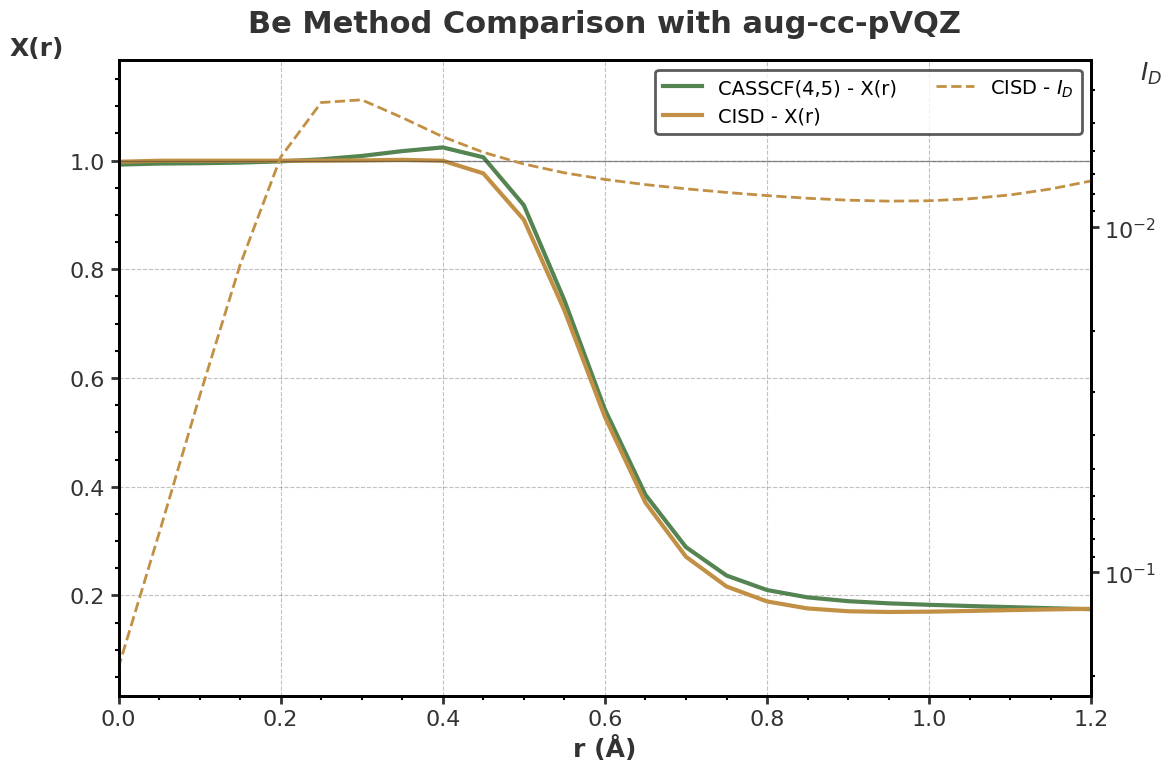

In [3]:
# Usage:
method_results = run_calculation(
    molecule_name="berilium",
    method_name=["CASSCF(4,5)", "CISD"],
    basis_name="aug-cc-pVQZ",
)
fig = plot_beryllium_method_comparison(method_results)
plt.show()

In [3]:
def plot_neon_method_comparison(results):
    """
    Enhanced plot for PowerPoint presentation comparing different methods
    for Beryllium calculations using aug-cc-pVQZ basis set.
    With secondary logarithmic axis for indicator_dynamic.
    """
    import matplotlib.pyplot as plt
    import numpy as np

    # Set up the plot style with larger elements for presentation
    plt.rcParams.update({
        'font.size': 16,
        'axes.labelsize': 18,
        'axes.titlesize': 20,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'legend.fontsize': 16,
        'lines.linewidth': 3
    })

    # Define colors
    colors = {
        'charcoal': '#333333',
        'cerulean': '#077FAE',  # HF
        'fern': '#548451',      # CASSCF
        'goldenrod': '#C29044'  # CISD/FullCI
    }

    # Create figure with primary axis
    fig, ax1 = plt.subplots(figsize=(12, 8))
    fig.patch.set_alpha(0.0)  # Transparent background
    ax1.patch.set_alpha(0.0)  # Transparent plot background

    # Create secondary axis
    ax2 = ax1.twinx()
    ax2.patch.set_alpha(0.0)  # Transparent plot background

    # Color map for methods (with CISD labeled as FullCI)
    color_map = {
        'HF': colors['cerulean'],
        'CASSCF(10,10)': colors['fern'],
        'CISD': colors['goldenrod']
    }

    # Label map (renames CISD to FullCI in the legend)
    label_map = {
        'HF': 'HF',
        'CASSCF(10,10)': 'CASSCF(10,10)',
        'CISD': 'CISD'
    }

    # Store handles for legends
    handles1 = []
    labels1 = []
    handles2 = []
    labels2 = []

    # Plot data for each method
    for result in results:
        df = result['ontop_data']
        method = result['method_name']

        # Calculate indicator
        df['X(r)'] = 2 * df['ontop'] / (df['density']**2)

        # Plot only up to r = 1.2
        mask = df['r'] <= 1.2

        if method == 'HF':
            df['X(r)'] = 2 * df['X(r)']  # HF has half the value

        # Primary axis: Plot X(r)
        line1, = ax1.plot(df.loc[mask, 'r'], df.loc[mask, 'X(r)'],
                  color=color_map[method], linewidth=3, label=f"{label_map[method]} - X(r)")
        handles1.append(line1)
        labels1.append(f"{label_map[method]} - X(r)")

        # Secondary axis: Plot indicator_dynamic on log scale
        if 'indicator_dynamic' in df.columns:
            # Only plot I_D for methods other than CASSCF
            if not method.startswith('CASSCF'):
                line2, = ax2.plot(df.loc[mask, 'r'], df.loc[mask, 'indicator_dynamic'],
                         color=color_map[method], linewidth=2, linestyle='--',
                         label=f"{label_map[method]} - $I_D$")
                handles2.append(line2)
                labels2.append(f"{label_map[method]} - $I_D$")

    # Add reference line at y = 1 for primary axis
    ref_line = ax1.axhline(y=1, color=colors['charcoal'], linewidth=1, linestyle='-', alpha=0.5)

    # Customize primary axis
    ax1.set_xlabel('r (Å)', color=colors['charcoal'], fontweight='bold')
    ax1.set_ylabel('X(r)', color=colors['charcoal'], fontweight='bold', rotation=0, loc='top')
    ax1.set_xlim(0, 1.2)

    # Determine primary y limits based on data
    all_y_values = []
    for result in results:
        df = result['ontop_data']
        df['X(r)'] = 2 * df['ontop'] / (df['density']**2)
        mask = df['r'] <= 1.2
        all_y_values.extend(df.loc[mask, 'X(r)'].tolist())

    y_min = min(all_y_values)
    y_max = max(all_y_values)
    margin = (y_max - y_min) * 0.1

    # Round limits to make numbers cleaner
    y_min_rounded = np.floor(y_min * 10) / 10
    y_max_rounded = np.ceil(y_max * 10) / 10
    ax1.set_ylim(max(0, y_min_rounded - margin), y_max_rounded + margin)

    # Customize secondary axis (logarithmic)
    ax2.set_ylabel('$I_D$', color=colors['charcoal'], fontweight='bold', rotation=0, loc='top')
    ax2.set_yscale('log')
    ax2.invert_yaxis()  # Invert the logarithmic axis

    # Combine handles and labels for legend
    all_handles = handles1 + handles2
    all_labels = labels1 + labels2

    # Add title - Changed from Helium to Be
    plt.title('Ne Method Comparison with aug-cc-pVQZ',
              fontsize=22, color=colors['charcoal'], fontweight='bold', pad=20)

    # Add legend with clear background and border - now inside the plot
    legend = ax1.legend(all_handles, all_labels, frameon=True, loc='upper right',
                        fontsize=14, facecolor='white', edgecolor=colors['charcoal'], ncol=2)
    legend.get_frame().set_linewidth(2)

    # Enhance tick marks and grid for primary axis
    ax1.grid(True, linestyle='--', alpha=0.3, color=colors['charcoal'])
    ax1.tick_params(colors=colors['charcoal'], width=2, length=6)

    # Enhance tick marks for secondary axis
    ax2.tick_params(colors=colors['charcoal'], width=2, length=6)

    # Make axis lines more visible
    for spine in ax1.spines.values():
        spine.set_linewidth(2)
    for spine in ax2.spines.values():
        spine.set_linewidth(2)

    # Add minor tick marks
    ax1.minorticks_on()
    ax1.tick_params(which='minor', length=3, width=1.5)
    ax2.minorticks_on()
    ax2.tick_params(which='minor', length=3, width=1.5)

    plt.tight_layout()
    return fig

Connected to atlas.


Connected to atlas.


INFO:project_3_indicator.input.specification:Creating input specification for neon_CASSCF(10,10)_aug-cc-pVQZ
INFO:project_3_indicator.input.specification:Dependencies validated successfully.
INFO:project_3_indicator.input.specification:Using default basis set 'aug-cc-pVQZ'.
INFO:root:Found completed calculation CALC_000064


Geometry for neon successfully loaded.
Method name: CASSCF(10,10) False


Disconnected from cluster.


INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.4)
INFO:paramiko.transport:Authentication (publickey) successful!


Connected to atlas.


INFO:project_3_indicator.input.specification:Creating input specification for neon_CISD_aug-cc-pVQZ
INFO:project_3_indicator.input.specification:Dependencies validated successfully.
INFO:project_3_indicator.input.specification:Using default basis set 'aug-cc-pVQZ'.
INFO:root:Found completed calculation CALC_000063


Geometry for neon successfully loaded.
Method name: CISD False


Disconnected from cluster.
Disconnected from cluster.


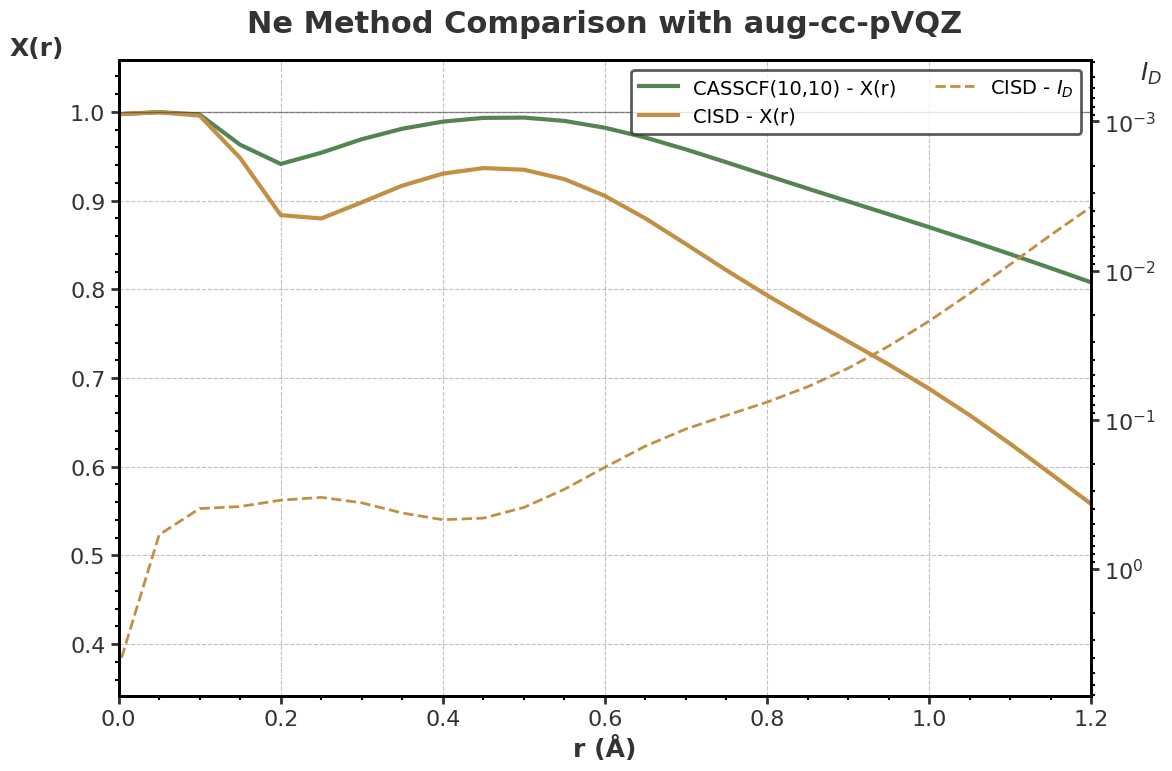

In [5]:
# Usage:
method_results = run_calculation(
    molecule_name="neon",
    method_name=["CASSCF(10,10)", "CISD"],
    basis_name="aug-cc-pVQZ",
)
fig = plot_neon_method_comparison(method_results)
plt.show()

INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.4)
INFO:paramiko.transport:Authentication (publickey) successful!


Connected to atlas.


INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.4)
INFO:paramiko.transport:Authentication (publickey) successful!


Connected to atlas.


INFO:project_3_indicator.input.specification:Creating input specification for hydrogen_CASSCF(2,2)_aug-cc-pVQZ
INFO:project_3_indicator.input.specification:Dependencies validated successfully.
INFO:project_3_indicator.input.specification:Using default basis set 'aug-cc-pVQZ'.
INFO:root:Found completed calculation CALC_000093


Geometry for hydrogen successfully loaded.
Method name: CASSCF(2,2) False


Disconnected from cluster.


INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.4)
INFO:paramiko.transport:Authentication (publickey) successful!


Connected to atlas.


INFO:project_3_indicator.input.specification:Creating input specification for hydrogen_CISD_aug-cc-pVQZ
INFO:project_3_indicator.input.specification:Dependencies validated successfully.
INFO:project_3_indicator.input.specification:Using default basis set 'aug-cc-pVQZ'.
INFO:root:Found completed calculation CALC_000091


Geometry for hydrogen successfully loaded.
Method name: CISD False


Disconnected from cluster.
Disconnected from cluster.


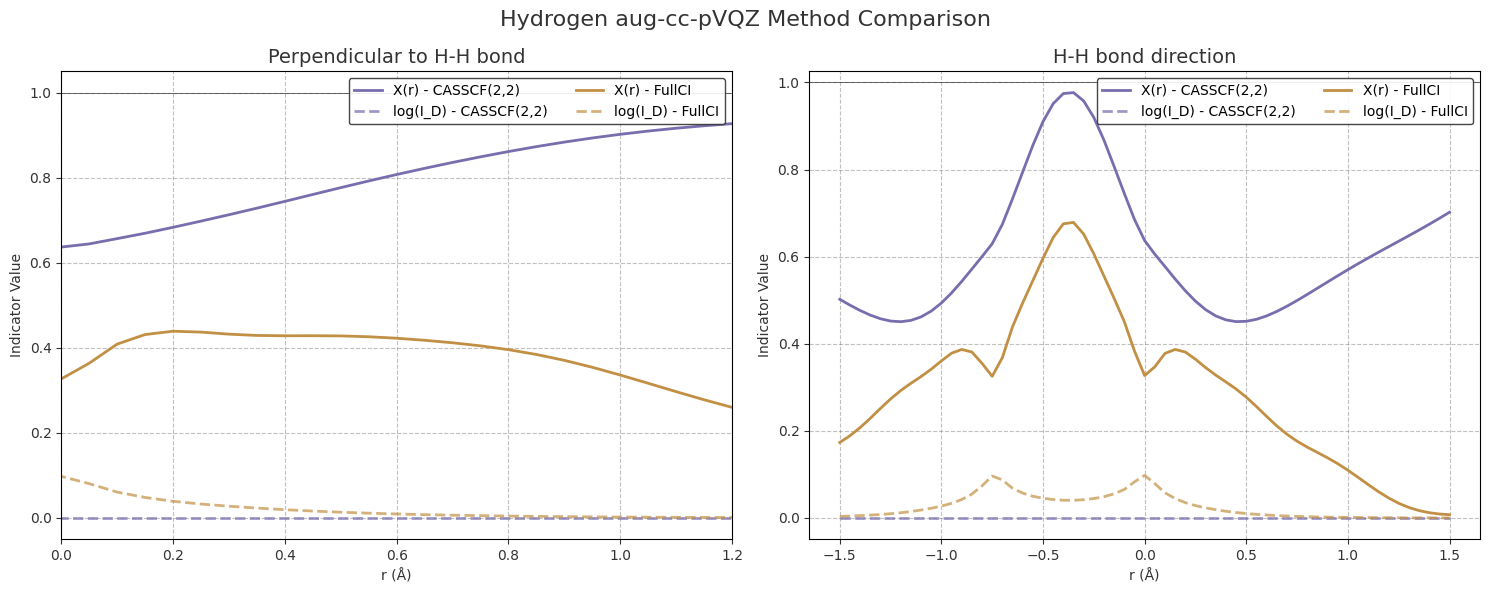

In [11]:
# Run calculations for H2 with CASSCF and CISD
hydrogen_results = run_calculation(
        molecule_name="hydrogen",
        method_name=["CASSCF(2,2)","CISD"],
        basis_name="aug-cc-pVQZ",
    )

def plot_hydrogen_methods(results):
    # Set up the plot style
    plt.style.use('default')
    # Define colors
    colors = {
        'charcoal': '#333333',
        'amethyst': '#786EAE',    # CASSCF
        'goldenrod': '#C29044',   # FullCI (CISD)
    }

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.patch.set_alpha(0.0)  # Transparent background
    ax1.patch.set_alpha(0.0)  # Transparent plot background
    ax2.patch.set_alpha(0.0)  # Transparent plot background

    # Plot data for each method
    method_labels = {
        'CISD': 'FullCI',
        'CASSCF(2,2)': 'CASSCF(2,2)'
    }

    color_map = {
        'CISD': colors['goldenrod'],
        'CASSCF(2,2)': colors['amethyst']
    }

    for result in results:
        df = result['ontop_data']
        method = result['method_name']

        # Calculate indicators
        df['X(r)'] = 2 * df['ontop'] / (df['density']**2)

        # Plot perpendicular direction (x)
        x_data = df[df['direction'] == 'x']
        mask_x = x_data['r'] <= 1.2

        ax1.plot(x_data.loc[mask_x, 'r'], x_data.loc[mask_x, 'X(r)'],
                color=color_map[method], linewidth=2,
                label=f'X(r) - {method_labels[method]}')

        ax1.plot(x_data.loc[mask_x, 'r'], x_data.loc[mask_x, 'indicator_dynamic'],
                color=color_map[method], linewidth=2, linestyle='--', alpha=0.7,
                label=f'log(I_D) - {method_labels[method]}')

        # Plot bond direction (z)
        z_data = df[df['direction'] == 'z']
        ax2.plot(z_data['r'], z_data['X(r)'],
                color=color_map[method], linewidth=2,
                label=f'X(r) - {method_labels[method]}')

        ax2.plot(z_data['r'], z_data['indicator_dynamic'],
                color=color_map[method], linewidth=2, linestyle='--', alpha=0.7,
                label=f'log(I_D) - {method_labels[method]}')

    # Customize first subplot (perpendicular)
    ax1.axhline(y=1, color=colors['charcoal'], linewidth=0.5, linestyle='-')
    ax1.set_xlabel('r (Å)', color=colors['charcoal'])
    ax1.set_ylabel('Indicator Value', color=colors['charcoal'])
    ax1.set_title('Perpendicular to H-H bond',
                 fontsize=14, color=colors['charcoal'])
    ax1.set_xlim(0, 1.2)
    ax1.grid(True, linestyle='--', alpha=0.3, color=colors['charcoal'])
    ax1.legend(framealpha=0.9, edgecolor=colors['charcoal'],
              ncol=2, loc='upper right', fontsize=10)
    ax1.tick_params(colors=colors['charcoal'])

    # Customize second subplot (bond direction)
    ax2.axhline(y=1, color=colors['charcoal'], linewidth=0.5, linestyle='-')
    ax2.set_xlabel('r (Å)', color=colors['charcoal'])
    ax2.set_ylabel('Indicator Value', color=colors['charcoal'])
    ax2.set_title('H-H bond direction',
                 fontsize=14, color=colors['charcoal'])
    ax2.grid(True, linestyle='--', alpha=0.3, color=colors['charcoal'])
    ax2.legend(framealpha=0.9, edgecolor=colors['charcoal'],
              ncol=2, loc='upper right', fontsize=10)
    ax2.tick_params(colors=colors['charcoal'])

    # Main title
    fig.suptitle('Hydrogen aug-cc-pVQZ Method Comparison',
                 fontsize=16, color=colors['charcoal'])

    plt.tight_layout()
    return fig

# Use the function
fig = plot_hydrogen_methods(hydrogen_results)
plt.show()

INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.4)
INFO:paramiko.transport:Authentication (publickey) successful!


Connected to atlas.


INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.4)
INFO:paramiko.transport:Authentication (publickey) successful!


Connected to atlas.


INFO:project_3_indicator.input.specification:Creating input specification for hydrogen_2eq_CASSCF(2,2)_aug-cc-pVQZ
INFO:project_3_indicator.input.specification:Dependencies validated successfully.
INFO:project_3_indicator.input.specification:Using default basis set 'aug-cc-pVQZ'.
INFO:root:Found completed calculation CALC_000102


Geometry for hydrogen_2eq successfully loaded.
Method name: CASSCF(2,2) False


Disconnected from cluster.


INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.4)
INFO:paramiko.transport:Authentication (publickey) successful!


Connected to atlas.


INFO:project_3_indicator.input.specification:Creating input specification for hydrogen_2eq_CISD_aug-cc-pVQZ
INFO:project_3_indicator.input.specification:Dependencies validated successfully.
INFO:project_3_indicator.input.specification:Using default basis set 'aug-cc-pVQZ'.
INFO:root:Found completed calculation CALC_000101


Geometry for hydrogen_2eq successfully loaded.
Method name: CISD False


Disconnected from cluster.
Disconnected from cluster.


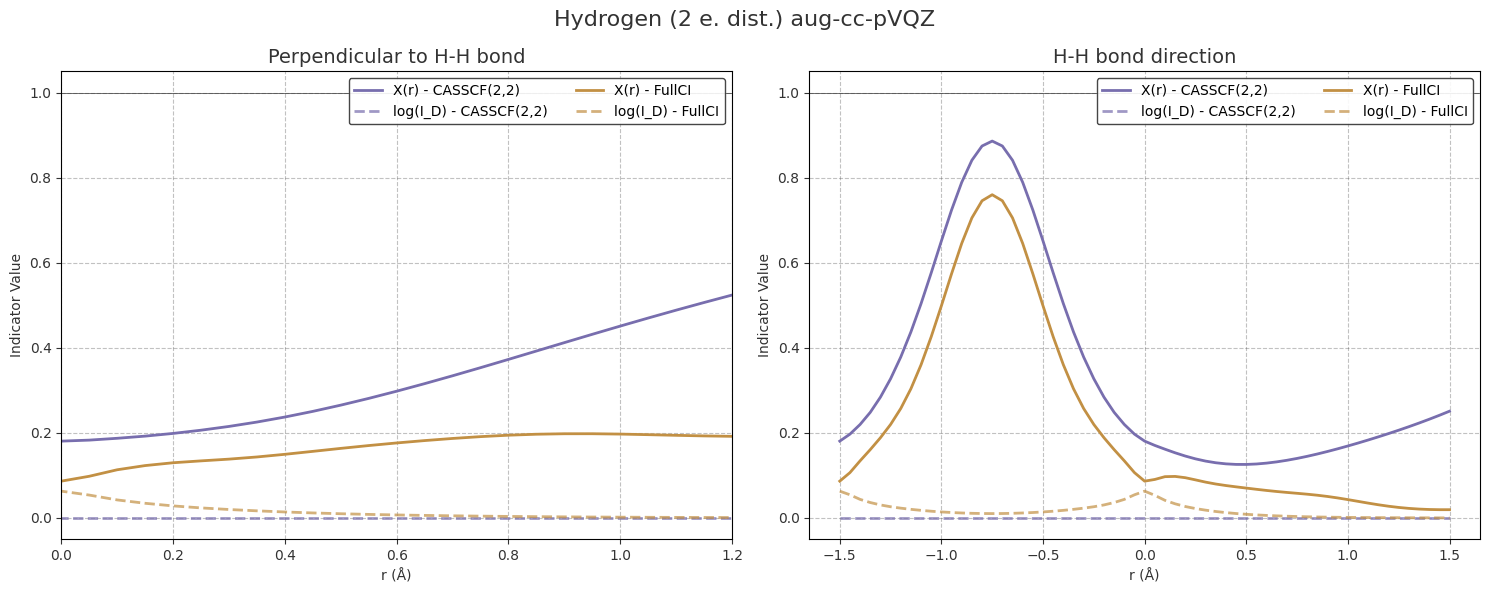

In [12]:
# Run calculations for H2 with CASSCF and CISD
hydrogen_results = run_calculation(
        molecule_name="hydrogen_2eq",
        method_name=["CASSCF(2,2)","CISD"],
        basis_name="aug-cc-pVQZ",
    )

def plot_hydrogen_methods(results):
    # Set up the plot style
    plt.style.use('default')
    # Define colors
    colors = {
        'charcoal': '#333333',
        'amethyst': '#786EAE',    # CASSCF
        'goldenrod': '#C29044',   # FullCI (CISD)
    }

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.patch.set_alpha(0.0)  # Transparent background
    ax1.patch.set_alpha(0.0)  # Transparent plot background
    ax2.patch.set_alpha(0.0)  # Transparent plot background

    # Plot data for each method
    method_labels = {
        'CISD': 'FullCI',
        'CASSCF(2,2)': 'CASSCF(2,2)'
    }

    color_map = {
        'CISD': colors['goldenrod'],
        'CASSCF(2,2)': colors['amethyst']
    }

    for result in results:
        df = result['ontop_data']
        method = result['method_name']

        # Calculate indicators
        df['X(r)'] = 2 * df['ontop'] / (df['density']**2)

        # Plot perpendicular direction (x)
        x_data = df[df['direction'] == 'x']
        mask_x = x_data['r'] <= 1.2

        ax1.plot(x_data.loc[mask_x, 'r'], x_data.loc[mask_x, 'X(r)'],
                color=color_map[method], linewidth=2,
                label=f'X(r) - {method_labels[method]}')

        ax1.plot(x_data.loc[mask_x, 'r'], x_data.loc[mask_x, 'indicator_dynamic'],
                color=color_map[method], linewidth=2, linestyle='--', alpha=0.7,
                label=f'log(I_D) - {method_labels[method]}')

        # Plot bond direction (z)
        z_data = df[df['direction'] == 'z']
        ax2.plot(z_data['r'], z_data['X(r)'],
                color=color_map[method], linewidth=2,
                label=f'X(r) - {method_labels[method]}')

        ax2.plot(z_data['r'], z_data['indicator_dynamic'],
                color=color_map[method], linewidth=2, linestyle='--', alpha=0.7,
                label=f'log(I_D) - {method_labels[method]}')

    # Customize first subplot (perpendicular)
    ax1.axhline(y=1, color=colors['charcoal'], linewidth=0.5, linestyle='-')
    ax1.set_xlabel('r (Å)', color=colors['charcoal'])
    ax1.set_ylabel('Indicator Value', color=colors['charcoal'])
    ax1.set_title('Perpendicular to H-H bond',
                 fontsize=14, color=colors['charcoal'])
    ax1.set_xlim(0, 1.2)
    ax1.grid(True, linestyle='--', alpha=0.3, color=colors['charcoal'])
    ax1.legend(framealpha=0.9, edgecolor=colors['charcoal'],
              ncol=2, loc='upper right', fontsize=10)
    ax1.tick_params(colors=colors['charcoal'])

    # Customize second subplot (bond direction)
    ax2.axhline(y=1, color=colors['charcoal'], linewidth=0.5, linestyle='-')
    ax2.set_xlabel('r (Å)', color=colors['charcoal'])
    ax2.set_ylabel('Indicator Value', color=colors['charcoal'])
    ax2.set_title('H-H bond direction',
                 fontsize=14, color=colors['charcoal'])
    ax2.grid(True, linestyle='--', alpha=0.3, color=colors['charcoal'])
    ax2.legend(framealpha=0.9, edgecolor=colors['charcoal'],
              ncol=2, loc='upper right', fontsize=10)
    ax2.tick_params(colors=colors['charcoal'])

    # Main title
    fig.suptitle('Hydrogen (2 eq. dist.) aug-cc-pVQZ',
                 fontsize=16, color=colors['charcoal'])

    plt.tight_layout()
    return fig

# Use the function
fig = plot_hydrogen_methods(hydrogen_results)
plt.show()

INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.4)
INFO:paramiko.transport:Authentication (publickey) successful!


Connected to atlas.


INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.4)
INFO:paramiko.transport:Authentication (publickey) successful!


Connected to atlas.


INFO:project_3_indicator.input.specification:Creating input specification for hydrogen_5eq_CASSCF(2,2)_aug-cc-pVQZ
INFO:project_3_indicator.input.specification:Dependencies validated successfully.
INFO:project_3_indicator.input.specification:Using default basis set 'aug-cc-pVQZ'.
INFO:root:Found completed calculation CALC_000116


Geometry for hydrogen_5eq successfully loaded.
Method name: CASSCF(2,2) False


Disconnected from cluster.
Disconnected from cluster.


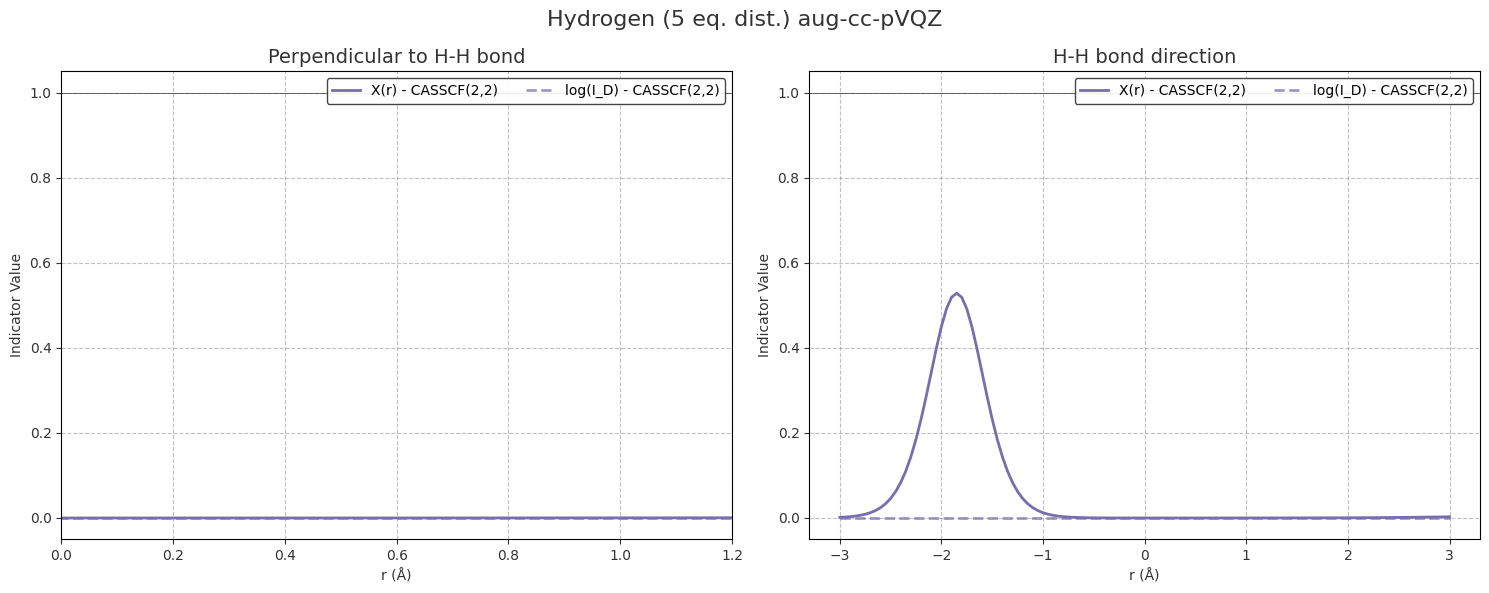

In [14]:
# Run calculations for H2 with CASSCF and CISD
hydrogen_results = run_calculation(
        molecule_name="hydrogen_5eq",
        method_name=["CASSCF(2,2)"],
        basis_name="aug-cc-pVQZ",
    )

def plot_hydrogen_methods(results):
    # Set up the plot style
    plt.style.use('default')
    # Define colors
    colors = {
        'charcoal': '#333333',
        'amethyst': '#786EAE',    # CASSCF
        'goldenrod': '#C29044',   # FullCI (CISD)
    }

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.patch.set_alpha(0.0)  # Transparent background
    ax1.patch.set_alpha(0.0)  # Transparent plot background
    ax2.patch.set_alpha(0.0)  # Transparent plot background

    # Plot data for each method
    method_labels = {
        'CISD': 'FullCI',
        'CASSCF(2,2)': 'CASSCF(2,2)'
    }

    color_map = {
        'CISD': colors['goldenrod'],
        'CASSCF(2,2)': colors['amethyst']
    }

    for result in results:
        df = result['ontop_data']
        method = result['method_name']

        # Calculate indicators
        df['X(r)'] = 2 * df['ontop'] / (df['density']**2)

        # Plot perpendicular direction (x)
        x_data = df[df['direction'] == 'x']
        mask_x = x_data['r'] <= 1.2

        ax1.plot(x_data.loc[mask_x, 'r'], x_data.loc[mask_x, 'X(r)'],
                color=color_map[method], linewidth=2,
                label=f'X(r) - {method_labels[method]}')

        ax1.plot(x_data.loc[mask_x, 'r'], x_data.loc[mask_x, 'indicator_dynamic'],
                color=color_map[method], linewidth=2, linestyle='--', alpha=0.7,
                label=f'log(I_D) - {method_labels[method]}')

        # Plot bond direction (z)
        z_data = df[df['direction'] == 'z']
        ax2.plot(z_data['r'], z_data['X(r)'],
                color=color_map[method], linewidth=2,
                label=f'X(r) - {method_labels[method]}')

        ax2.plot(z_data['r'], z_data['indicator_dynamic'],
                color=color_map[method], linewidth=2, linestyle='--', alpha=0.7,
                label=f'log(I_D) - {method_labels[method]}')

    # Customize first subplot (perpendicular)
    ax1.axhline(y=1, color=colors['charcoal'], linewidth=0.5, linestyle='-')
    ax1.set_xlabel('r (Å)', color=colors['charcoal'])
    ax1.set_ylabel('Indicator Value', color=colors['charcoal'])
    ax1.set_title('Perpendicular to H-H bond',
                 fontsize=14, color=colors['charcoal'])
    ax1.set_xlim(0, 1.2)
    ax1.grid(True, linestyle='--', alpha=0.3, color=colors['charcoal'])
    ax1.legend(framealpha=0.9, edgecolor=colors['charcoal'],
              ncol=2, loc='upper right', fontsize=10)
    ax1.tick_params(colors=colors['charcoal'])

    # Customize second subplot (bond direction)
    ax2.axhline(y=1, color=colors['charcoal'], linewidth=0.5, linestyle='-')
    ax2.set_xlabel('r (Å)', color=colors['charcoal'])
    ax2.set_ylabel('Indicator Value', color=colors['charcoal'])
    ax2.set_title('H-H bond direction',
                 fontsize=14, color=colors['charcoal'])
    ax2.grid(True, linestyle='--', alpha=0.3, color=colors['charcoal'])
    ax2.legend(framealpha=0.9, edgecolor=colors['charcoal'],
              ncol=2, loc='upper right', fontsize=10)
    ax2.tick_params(colors=colors['charcoal'])

    # Main title
    fig.suptitle('Hydrogen (5 eq. dist.) aug-cc-pVQZ',
                 fontsize=16, color=colors['charcoal'])

    plt.tight_layout()
    return fig

# Use the function
fig = plot_hydrogen_methods(hydrogen_results)
plt.show()

In [ ]:
method_results = run_calculation(
    molecule_name="ethene",
    method_name=["CASSCF(2,2)", "CISD"],
    basis_name="TZVP",
)

In [12]:
def plot_ethene_methods(results):
    """
    Enhanced plot for comparing different methods for ethene calculations
    with two subplots for different directions.
    """
    import matplotlib.pyplot as plt
    import numpy as np

    # Set up the plot style with larger elements for presentation
    plt.rcParams.update({
        'font.size': 14,
        'axes.labelsize': 16,
        'axes.titlesize': 18,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'legend.fontsize': 14,
        'lines.linewidth': 3
    })

    # Define colors
    colors = {
        'charcoal': '#333333',
        'amethyst': '#786EAE',  # CASSCF
        'goldenrod': '#C29044'  # CISD
    }

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    fig.patch.set_alpha(0.0)  # Transparent background
    ax1.patch.set_alpha(0.0)  # Transparent plot background
    ax2.patch.set_alpha(0.0)  # Transparent plot background

    # Create secondary axes for logarithmic scales
    ax1_twin = ax1.twinx()
    ax1_twin.patch.set_alpha(0.0)
    ax2_twin = ax2.twinx()
    ax2_twin.patch.set_alpha(0.0)

    # Plot data for each method
    method_labels = {
        'CISD': 'CISD',
        'CASSCF(2,2)': 'CASSCF(2,2)'
    }

    color_map = {
        'CISD': colors['goldenrod'],
        'CASSCF(2,2)': colors['amethyst']
    }

    # Store handles for legend
    handles = []
    labels = []

    min_x_value = float('inf')  # For adjusting second plot x-axis

    for result in results:
        df = result['ontop_data']
        method = result['method_name']

        # Calculate indicators
        df['X(r)'] = 2 * df['ontop'] / (df['density']**2)

        # Plot perpendicular direction (x)
        x_data = df[df['direction'] == 'x']
        mask_x = x_data['r'] <= 1.2

        line1, = ax1.plot(x_data.loc[mask_x, 'r'], x_data.loc[mask_x, 'X(r)'],
                 color=color_map[method], linewidth=3,
                 label=f'X(r) - {method_labels[method]}')

        # Only plot I_D for non-CASSCF methods
        if 'indicator_dynamic' in x_data.columns and not method.startswith('CASSCF'):
            line2, = ax1_twin.plot(x_data.loc[mask_x, 'r'], x_data.loc[mask_x, 'indicator_dynamic'],
                         color=color_map[method], linewidth=2, linestyle='--', alpha=0.8,
                         label=f'$I_D$ - {method_labels[method]}')

            # Add to handles and labels if this is CISD
            if method == 'CISD':
                handles.append(line2)
                labels.append(f'$I_D$ - {method_labels[method]}')

        # Plot bond direction (z)
        z_data = df[df['direction'] == 'z']

        # Find minimum x value for CASSCF
        if method == 'CASSCF(2,2)':
            min_index = z_data['X(r)'].idxmin()
            min_r_at_min_x = z_data.loc[min_index, 'r']
        z_data['r'] = z_data['r'] - min_r_at_min_x


        ax2.plot(z_data['r'], z_data['X(r)'],
                color=color_map[method], linewidth=3,
                label=f'X(r) - {method_labels[method]}')

        # Only plot I_D for non-CASSCF methods
        if 'indicator_dynamic' in z_data.columns and not method.startswith('CASSCF'):
            ax2_twin.plot(z_data['r'], z_data['indicator_dynamic'],
                        color=color_map[method], linewidth=2, linestyle='--', alpha=0.8,
                        label=f'$I_D$ - {method_labels[method]}')

        # Add to legend
        handles.append(line1)
        labels.append(f'X(r) - {method_labels[method]}')

    # Add reference line at y = 1
    ax1.axhline(y=1, color=colors['charcoal'], linewidth=1, linestyle='-', alpha=0.5)
    ax2.axhline(y=1, color=colors['charcoal'], linewidth=1, linestyle='-', alpha=0.5)

    # Customize first subplot (perpendicular)
    ax1.set_xlabel('r (Å)', color=colors['charcoal'], fontweight='bold')
    ax1.set_ylabel('X(r)', color=colors['charcoal'], fontweight='bold', rotation=0, loc='top')
    ax1.set_title('Perpendicular to the plane',
               fontsize=18, color=colors['charcoal'], fontweight='bold', pad=10)
    ax1.set_xlim(0, 1.2)
    ax1.grid(True, linestyle='--', alpha=0.3, color=colors['charcoal'])
    ax1.tick_params(colors=colors['charcoal'], width=2, length=6)

    # Set logarithmic scale for secondary axis and invert it
    ax1_twin.set_ylabel('$I_D$', color=colors['charcoal'], fontweight='bold', rotation=0, loc='top')
    ax1_twin.set_yscale('log')
    ax1_twin.invert_yaxis()  # Invert the axis
    ax1_twin.tick_params(colors=colors['charcoal'], width=2, length=6)

    # Customize second subplot (bond direction)
    ax2.set_xlabel('r (Å)', color=colors['charcoal'], fontweight='bold')
    ax2.set_ylabel('X(r)', color=colors['charcoal'], fontweight='bold', rotation=0, loc='top')
    ax2.set_title('C-C bond direction',
               fontsize=18, color=colors['charcoal'], fontweight='bold', pad=10)

    # Start x-axis from minimum CASSCF value


    ax2.grid(True, linestyle='--', alpha=0.3, color=colors['charcoal'])
    ax2.tick_params(colors=colors['charcoal'], width=2, length=6)
    ax2.set_xlim(-5, 5)
    # Set logarithmic scale for secondary axis and invert it
    ax2_twin.set_ylabel('$I_D$', color=colors['charcoal'], fontweight='bold', rotation=0, loc='top')
    ax2_twin.set_yscale('log')
    ax2_twin.invert_yaxis()  # Invert the axis
    ax2_twin.tick_params(colors=colors['charcoal'], width=2, length=6)

    # Make axis lines more visible for all axes
    for ax in [ax1, ax2, ax1_twin, ax2_twin]:
        for spine in ax.spines.values():
            spine.set_linewidth(2)
        ax.minorticks_on()
        ax.tick_params(which='minor', length=3, width=1.5)

    # Main title
    fig.suptitle('Ethene TZVP',
               fontsize=22, color=colors['charcoal'], fontweight='bold')

    # Add single legend at the bottom
    fig.legend(handles, labels,
              loc='lower center', bbox_to_anchor=(0.5, 0.01),
              ncol=4, frameon=True, facecolor='white',
              edgecolor=colors['charcoal'], fontsize=12)

    plt.tight_layout()
    # Adjust layout to make room for the legend
    plt.subplots_adjust(bottom=0.15)

    return fig

/tmp/ipykernel_5011/1622800916.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z_data['r'] = z_data['r'] - min_r_at_min_x


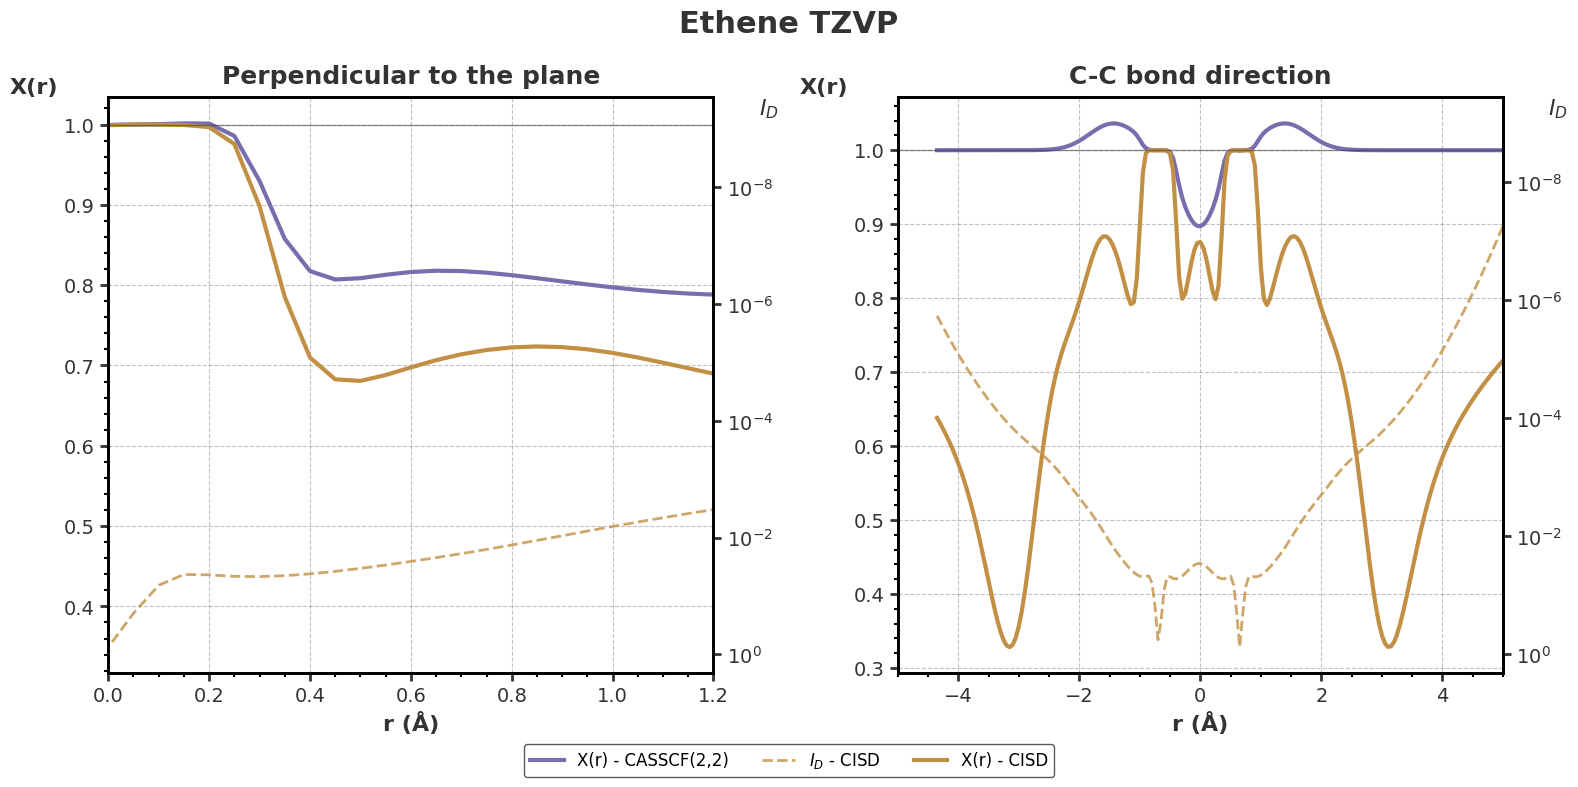

In [13]:
# Usage:

fig = plot_ethene_methods(method_results)
plt.show()